In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sktime.datasets import load_airline
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.pipeline import make_pipeline

In [21]:
def load_npy(filename):
    return np.load(filename)

# Identifying threshold

In [22]:
import os
dir_path = 'time_series/'
len_threshold = 1400

In [23]:
X, y, ids = [], [], []
genres = []
genre_count = {}  # Track the number of samples extracted for each genre

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    track_id = split[0]
    genre = split[1][:-4]
    
    if genre not in genre_count:
        genre_count[genre] = 0
    
    if genre_count[genre] >= 100:
        continue  # Skip if already extracted 100 samples for this genre
    
    ids.append(track_id)
    y.append(genre)
    genres.append(split)
    ts = np.load(os.path.join(dir_path, file))
    
    if len(ts) > len_threshold: 
        ts = ts[:len_threshold]  # Truncate if longer
    else:
        pad = [ts[-1]] * (len_threshold - len(ts))  # Fill with last observation 
        ts = np.append(ts, pad) 

    X.append([ts])
    genre_count[genre] += 1

X, y, ids = np.array(X), np.array(y), np.array(ids)

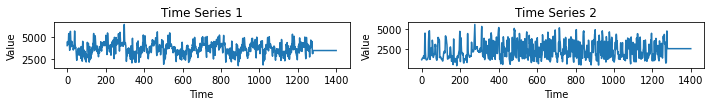

In [24]:
# Plot the first 10 time series
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.subplot(5, 2, i+1)  # 5 rows, 2 columns, i+1 is the plot index
    plt.plot(X[i][0])  # Assuming X is a list of lists where each inner list contains a single time series
    plt.title(f"Time Series {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

### We can note no info after 1200...so we set 1280 as treshold

In [25]:
len_threshold = 1280   #cause >1280 no infos in ts 

# Loading TS

In [115]:
X, y, ids = [], [], []
genres = []
genre_count = {}  # Track the number of samples extracted for each genre

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    track_id = split[0]
    genre = split[1][:-4]
    
    if genre not in genre_count:
        genre_count[genre] = 0
    
    if genre_count[genre] >= 100:
        continue  # Skip if already extracted 100 samples for this genre
    
    ids.append(track_id)
    y.append(genre)
    genres.append(split)
    ts = np.load(os.path.join(dir_path, file))
    
    if len(ts) > len_threshold: 
        ts = ts[:len_threshold]  # Truncate if longer
    else:
        pad = [ts[-1]] * (len_threshold - len(ts))  # Fill with last observation 
        ts = np.append(ts, pad) 

    X.append([ts])
    genre_count[genre] += 1

X, y, ids = np.array(X), np.array(y), np.array(ids)

In [116]:
second_elements = [item[1] for item in genres]

unique_elements = list(set([element.replace('.npy', '') for element in second_elements]))
print(unique_elements)
len(unique_elements)

['new-age', 'opera', 'folk', 'honky-tonk', 'synth-pop', 'emo', 'salsa', 'j-idol', 'world-music', 'goth', 'sertanejo', 'piano', 'mpb', 'happy', 'progressive-house', 'kids', 'minimal-techno', 'songwriter', 'sleep', 'heavy-metal']


20

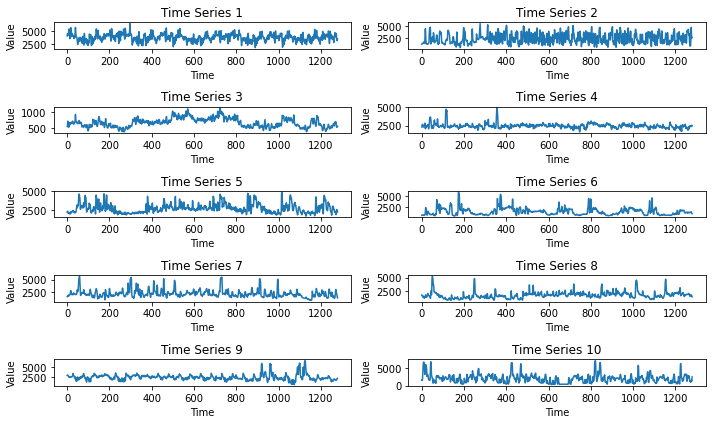

In [117]:
# Plot the first 10 time series
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(5, 2, i+1)  # 5 rows, 2 columns, i+1 is the plot index
    plt.plot(X[i][0])  # Assuming X is a list of lists where each inner list contains a single time series
    plt.title(f"Time Series {i+1}")
    plt.xlabel("Time")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Trasformazioni (amplitude scaling, noise)  win size= 50

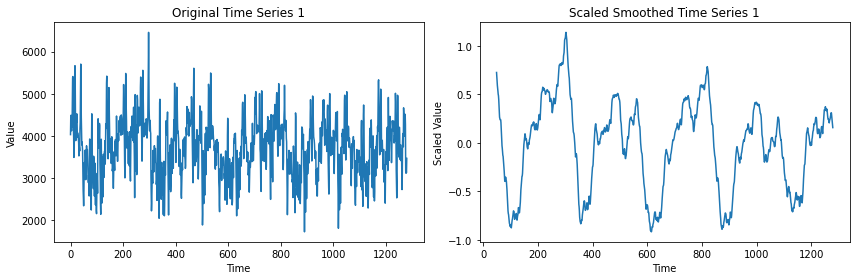

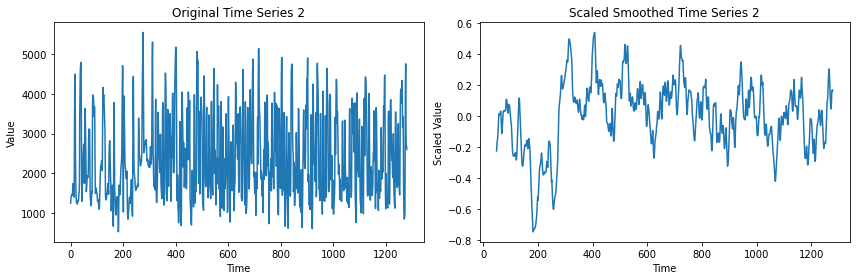

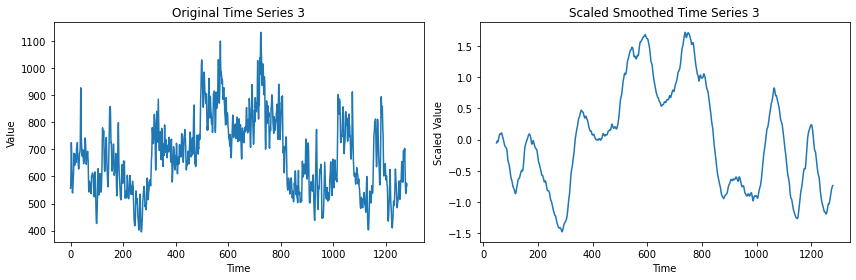

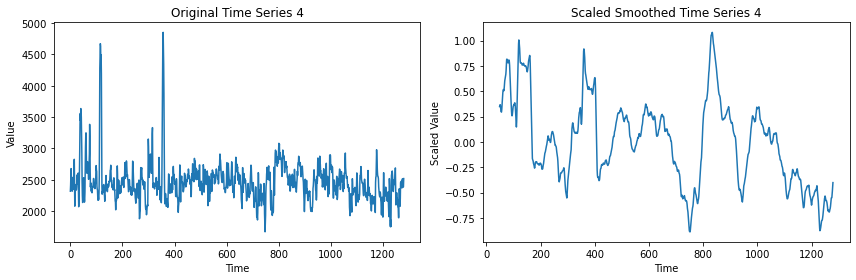

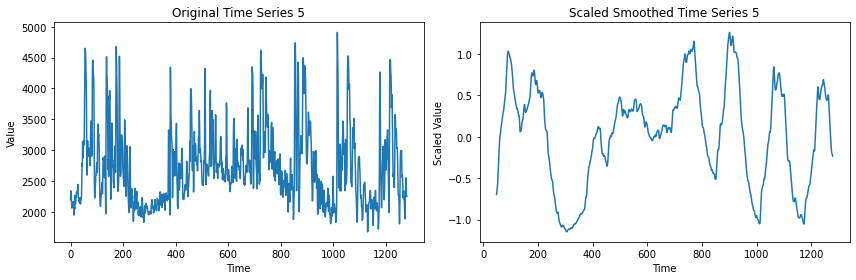

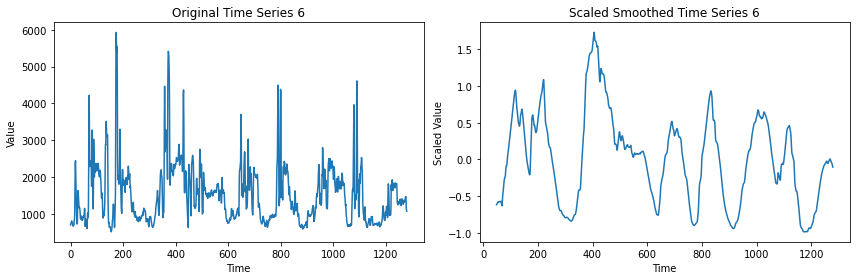

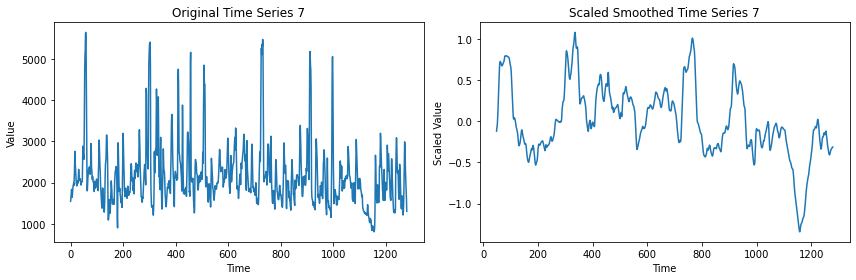

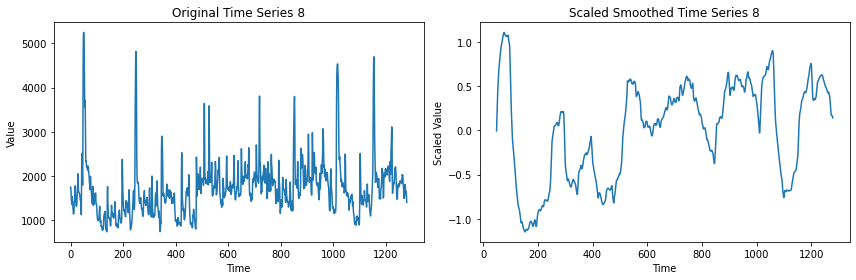

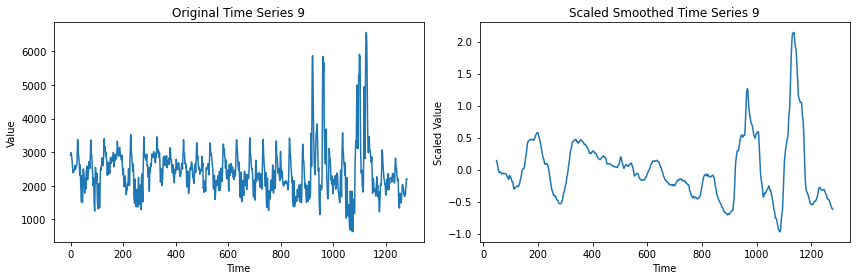

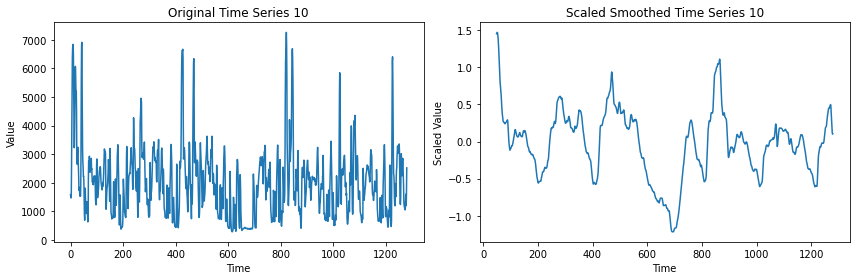

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define window size for rolling mean
w = 50

# Assume X contains the time series data for the first 10 time series
scaler = StandardScaler()

for i in range(10):
    ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series
    
    # Scale the time series
    tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
    
    # Mean centering and standardization
    ts_scaled = ((tss - tss.mean()) / tss.std())
    
    # Apply rolling window mean
    ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w).mean()
    
    # Plot comparison subplot
    plt.figure(figsize=(12, 4))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(ts)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Original Time Series {i+1}")
    
    # Plot scaled and smoothed time series
    plt.subplot(1, 2, 2)
    plt.plot(ts_smoothed)
    plt.xlabel("Time")
    plt.ylabel("Scaled Value")
    plt.title(f"Scaled Smoothed Time Series {i+1}")
    
    plt.tight_layout()
    plt.show()


# Trasformazioni (amplitude scaling, noise)  win size= 100

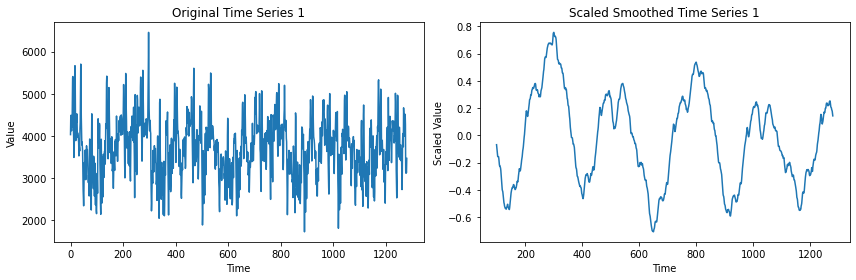

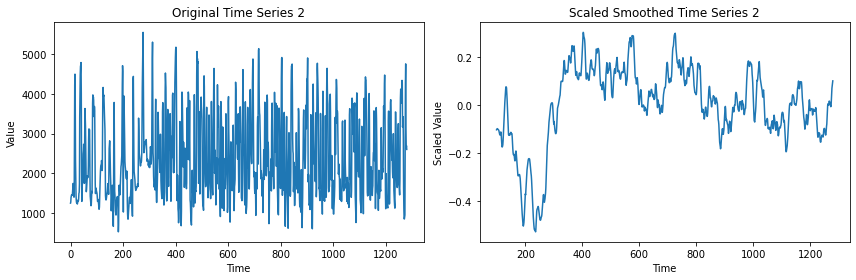

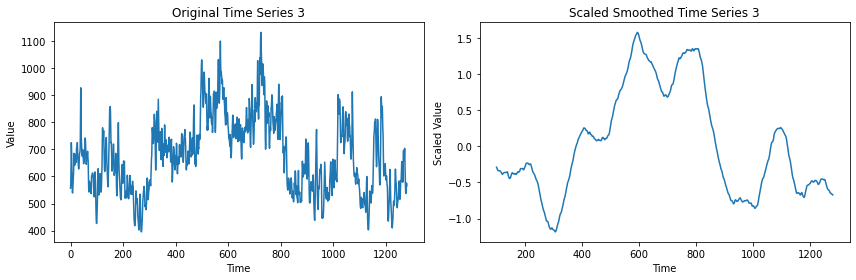

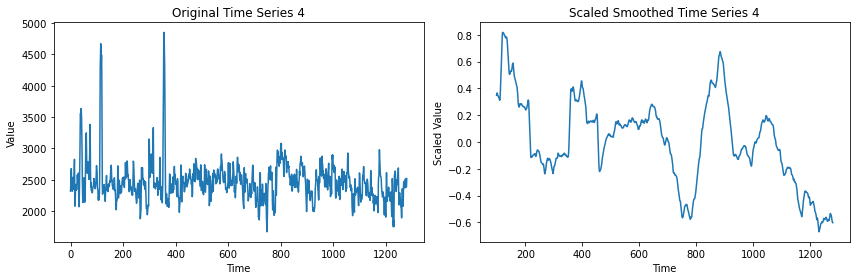

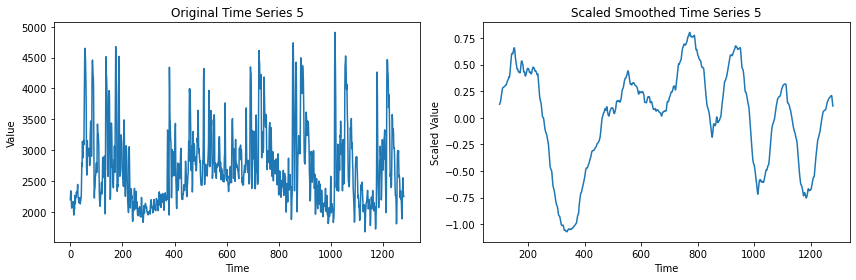

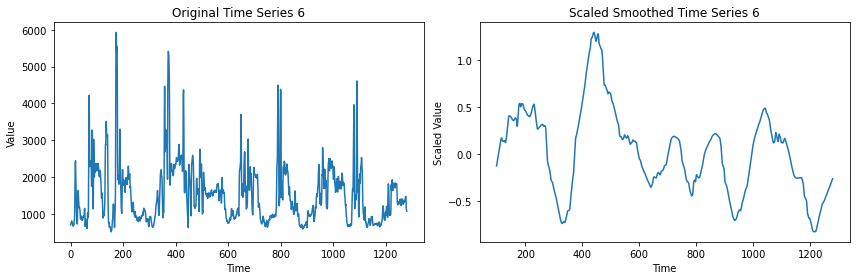

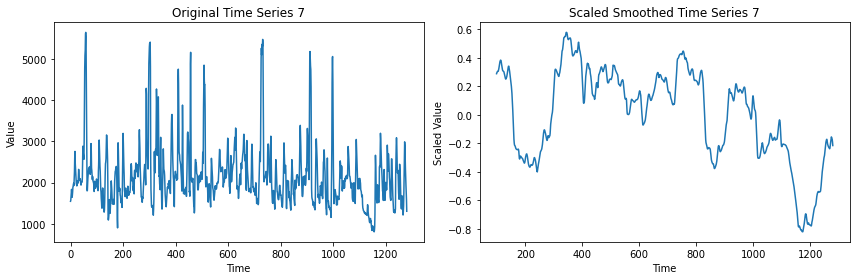

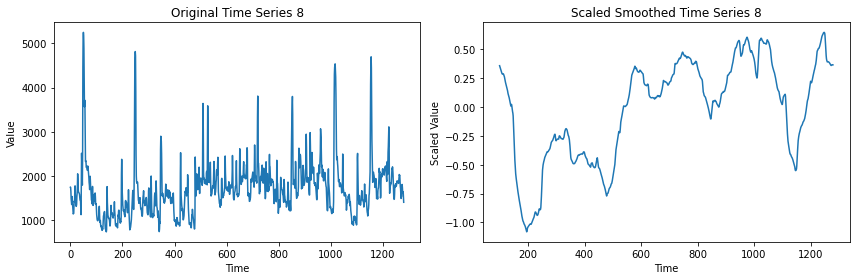

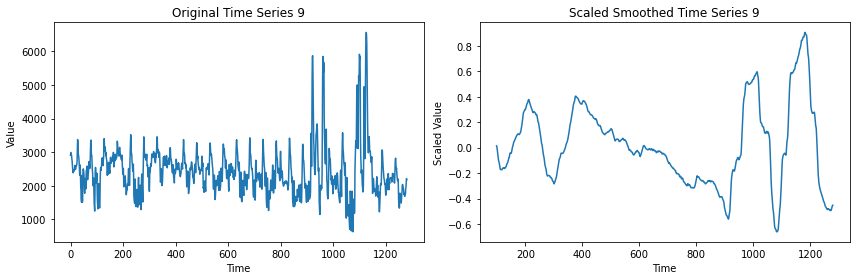

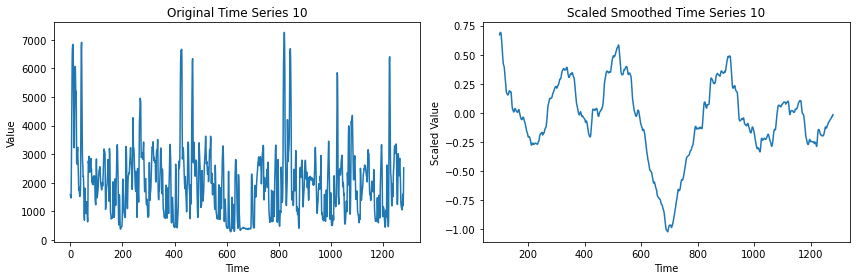

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define window size for rolling mean
w = 100

# Assume X contains the time series data for the first 10 time series
scaler = StandardScaler()

for i in range(10):
    ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series
    
    # Scale the time series
    tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
    
    # Mean centering and standardization
    ts_scaled = ((tss - tss.mean()) / tss.std())
    
    # Apply rolling window mean
    ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w).mean()
    
    # Plot comparison subplot
    plt.figure(figsize=(12, 4))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(ts)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Original Time Series {i+1}")
    
    # Plot scaled and smoothed time series
    plt.subplot(1, 2, 2)
    plt.plot(ts_smoothed)
    plt.xlabel("Time")
    plt.ylabel("Scaled Value")
    plt.title(f"Scaled Smoothed Time Series {i+1}")
    
    plt.tight_layout()
    plt.show()


In [31]:
from sktime.transformations.panel.dictionary_based import PAA

## Approssimazione (100 intervalli)

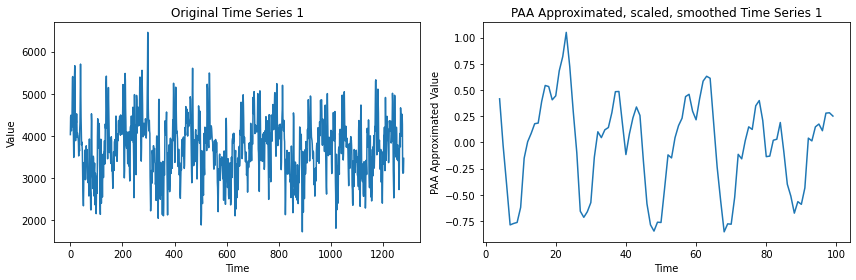

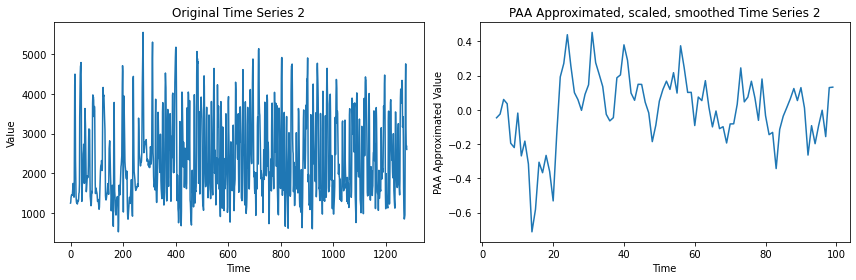

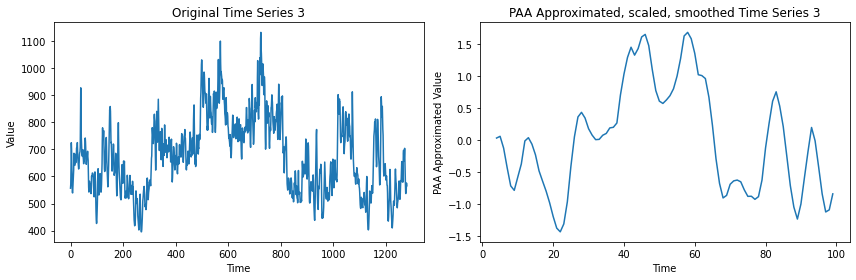

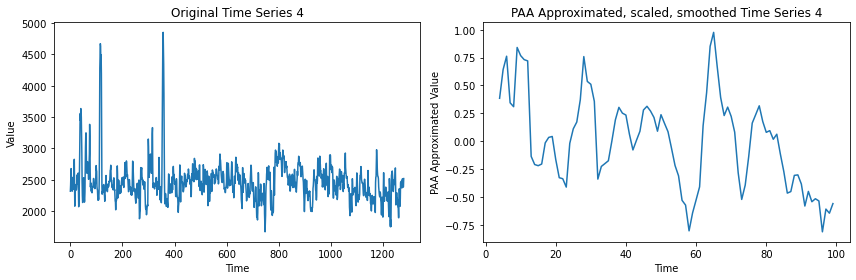

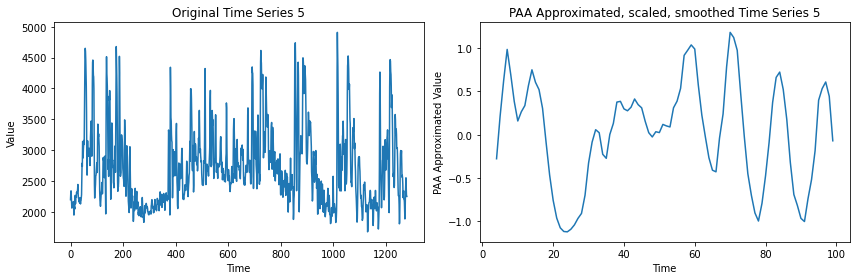

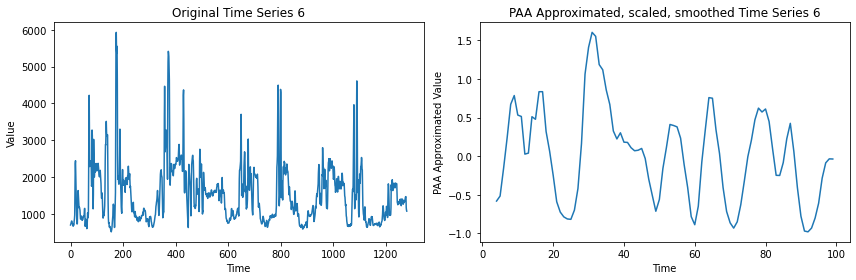

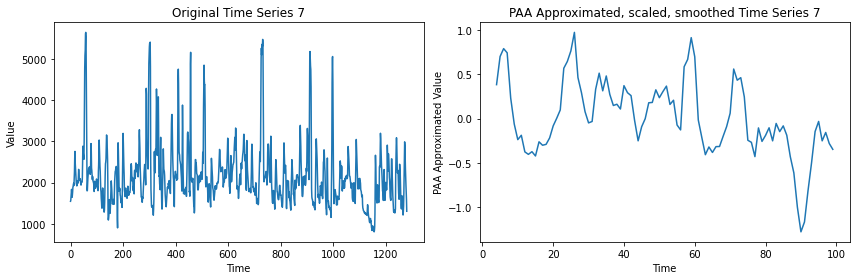

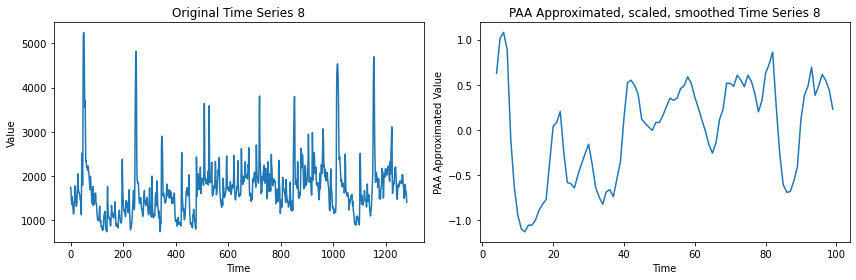

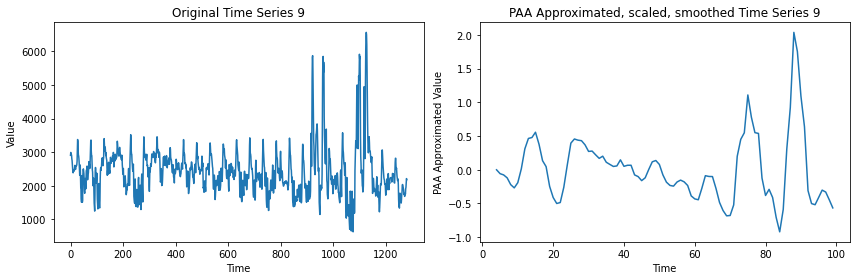

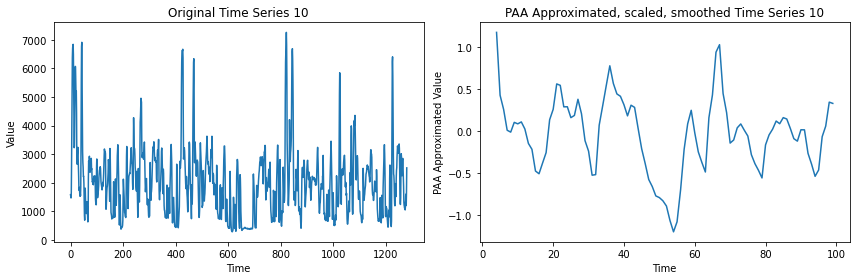

In [32]:
from sktime.transformations.panel.dictionary_based import PAA

# Define window size for rolling mean
w = 50

# Assume X contains the time series data for the first 10 time series
scaler = StandardScaler()

for i in range(10):
    ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series
    
    # Scale the time series
    tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
    
    # Mean centering and standardization   (amplitude scaling)
    ts_scaled = ((tss - tss.mean()) / tss.std())
    
    # Apply rolling window mean     (noise)
    ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w).mean()
    
    # Perform Piecewise Aggregate Approximation (PAA)
    paa = PAA(num_intervals=100) # Piecewise Aggregate Approximation w. 100 intervals
    ts_paa = paa.fit_transform(pd.DataFrame(ts_smoothed)).iloc[:, 0].values
    
    # Plot comparison subplot
    plt.figure(figsize=(12, 4))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(ts)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Original Time Series {i+1}")
    
    # Plot PAA-approximated smoothed and scaled time series
    plt.subplot(1, 2, 2)
    plt.plot(ts_paa)
    plt.xlabel("Time")
    plt.ylabel("PAA Approximated Value")
    plt.title(f"PAA Approximated, scaled, smoothed Time Series {i+1}")
    
    plt.tight_layout()
    plt.show()


## Approssimazione (50 intervalli)

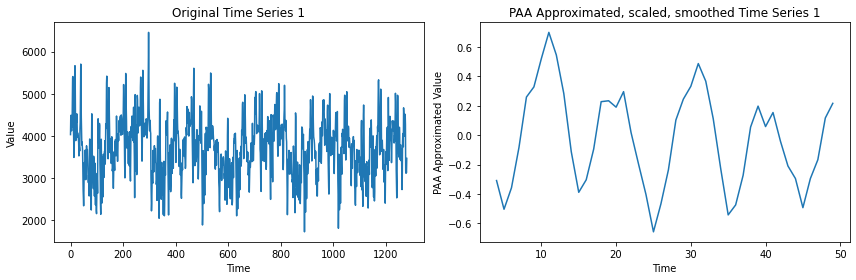

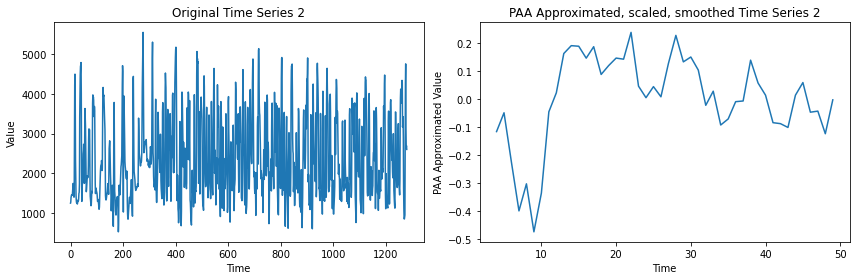

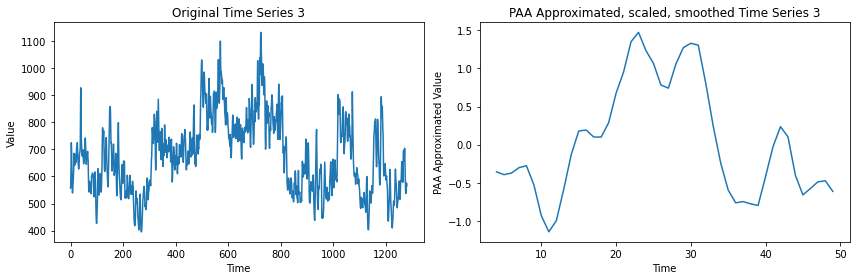

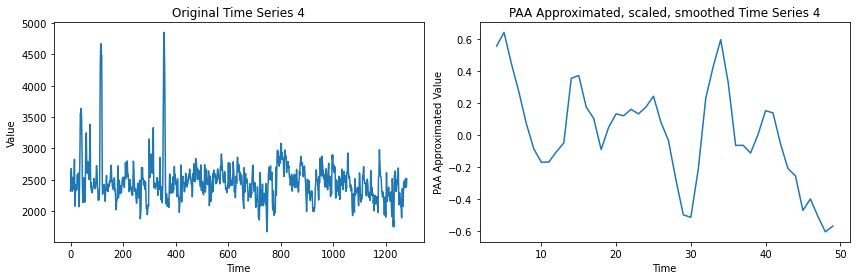

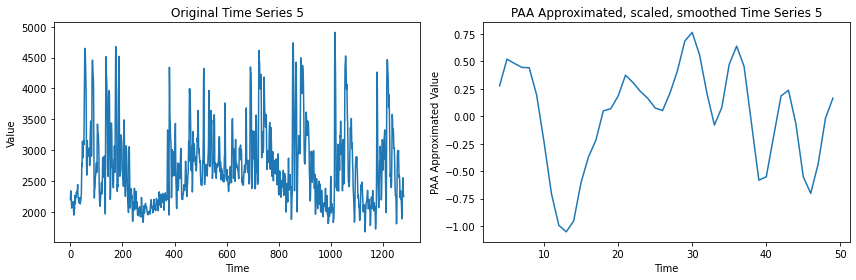

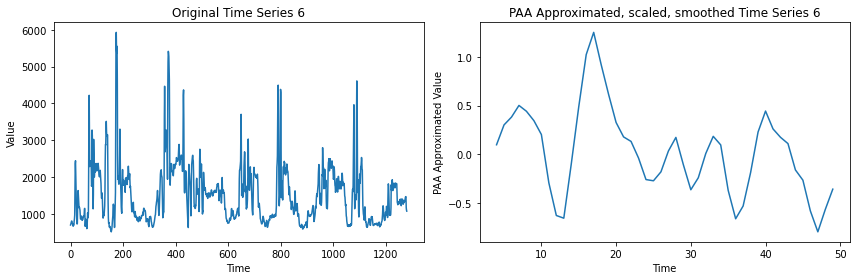

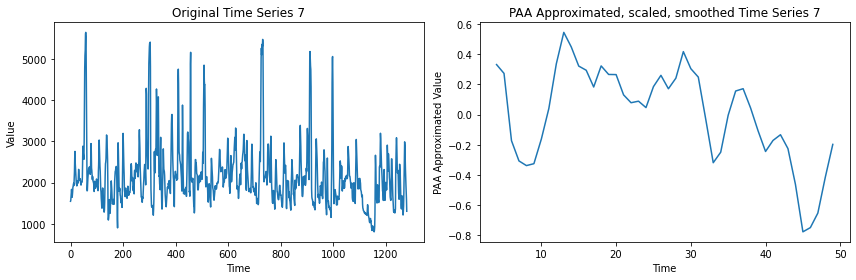

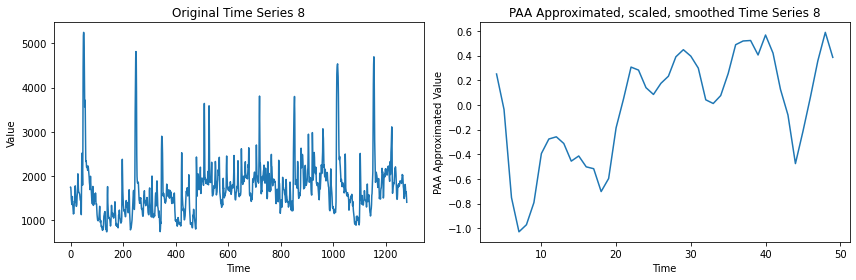

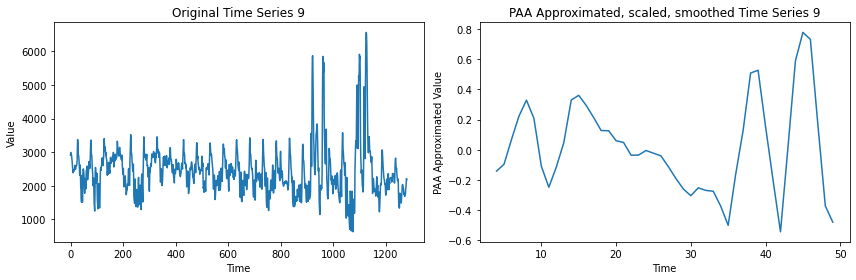

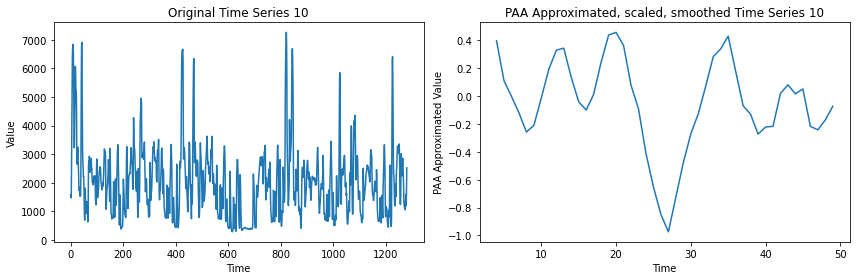

In [33]:
from sktime.transformations.panel.dictionary_based import PAA

# Define window size for rolling mean
w = 100

# Assume X contains the time series data for the first 10 time series
scaler = StandardScaler()

for i in range(10):
    ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series
    
    # Scale the time series
    tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
    
    # Mean centering and standardization   (amplitude scaling)
    ts_scaled = ((tss - tss.mean()) / tss.std())
    
    # Apply rolling window mean     (noise)
    ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w).mean()
    
    # Perform Piecewise Aggregate Approximation (PAA)
    paa = PAA(num_intervals=50) # Piecewise Aggregate Approximation w. 100 intervals
    ts_paa = paa.fit_transform(pd.DataFrame(ts_smoothed)).iloc[:, 0].values
    
    # Plot comparison subplot
    plt.figure(figsize=(12, 4))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(ts)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Original Time Series {i+1}")
    
    # Plot PAA-approximated smoothed and scaled time series
    plt.subplot(1, 2, 2)
    plt.plot(ts_paa)
    plt.xlabel("Time")
    plt.ylabel("PAA Approximated Value")
    plt.title(f"PAA Approximated, scaled, smoothed Time Series {i+1}")
    
    plt.tight_layout()
    plt.show()


# Noise removal reconstruct and MSE

In [118]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# Define your time series data in X

# Define window size for rolling mean
w_values = [5, 10, 100, 150, 180, 250]

original_series_list = []
scaled_series_list = []
smoothed_series_list = []
euclidean_distance_list = []

min_distance = float('inf')  # Initialize min_distance with infinity
best_w = None

for w in w_values:
    scaled_series_per_w = []  # List to store scaled series for the current window size
    smoothed_series_per_w = []  # List to store smoothed series for the current window size
    original_series_per_w = []  # List to store reconstructed series for the current window size
    
    distance_sum = 0
    for i in range(len(X)):
        ts = X[i][0]  # Assuming X is a list of time series
        
        # Scale the time series
        scaler = StandardScaler()
        tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))
        
        # Mean centering and standardization (amplitude scaling)
        ts_scaled = ((tss - tss.mean()) / tss.std())
        
        # Apply rolling window mean (noise)
        ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w, min_periods=1).mean()
            
        # Capture noise (difference between scaled and smoothed series)
        noise = ts_scaled.squeeze() - ts_smoothed
        
        # Reconstruct the original time series by adding back the noise
        original_series = ts_smoothed + noise

        # Append the current time series to the lists for the current window size
        scaled_series_per_w.append(ts_scaled)
        smoothed_series_per_w.append(ts_smoothed)
        original_series_per_w.append(original_series)

        
        # Calculate Euclidean distance between original and smoothed time series
        distance = pairwise_distances(ts_scaled.flatten().reshape(1, -1), np.array(original_series).flatten().reshape(1, -1), metric='euclidean')
        distance_sum += distance

    # Calculate average Euclidean distance for the current window size
    avg_distance = distance_sum / len(X)
    euclidean_distance_list.append(avg_distance)
    
    # Update min_distance and best_w if the current average distance is smaller than min_distance
    if avg_distance < min_distance:
        min_distance = avg_distance
        best_w = w
        
    # Append the lists for the current window size to the main lists
    scaled_series_list.append(scaled_series_per_w)
    smoothed_series_list.append(smoothed_series_per_w)
    original_series_list.append(original_series_per_w)

# Print best window size and corresponding minimum Euclidean distance
print("Best window size:", best_w)
print("Minimum Euclidean distance:", min_distance)


Best window size: 150
Minimum Euclidean distance: [[4.33924971e-07]]


In [119]:
# Find the index of the best window size in w_values
best_w_index = w_values.index(best_w)

# Select the lists corresponding to the best window size
best_scaled_series_list = scaled_series_list[best_w_index]
best_smoothed_series_list = smoothed_series_list[best_w_index]
best_original_series_list = original_series_list[best_w_index]

# Now you can use best_scaled_series_list, best_smoothed_series_list, and best_original_series_list
# for further analysis or visualization

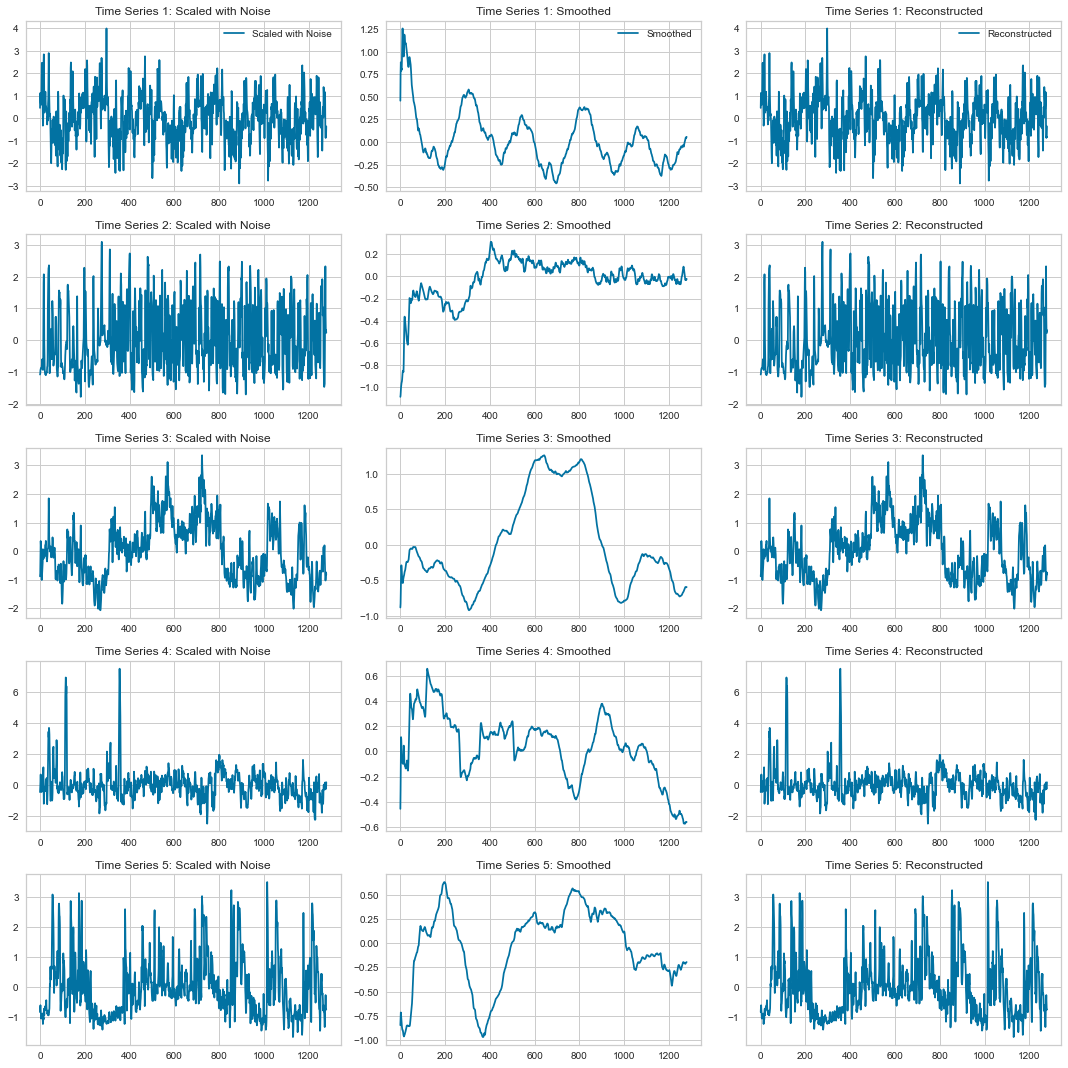

In [227]:
# Plot the scaled time series with noise and the reconstructed time series side by side
num_series_to_plot = (5)  # Plot at most 50 time series or the number available
num_plots = 3  # Three plots per time series: scaled with noise, smoothed, and reconstructed

if num_series_to_plot > 0:
    plt.figure(figsize=(15, num_series_to_plot*3))

    for i in range(num_series_to_plot):
        for j in range(num_plots):
            plt.subplot(num_series_to_plot, num_plots, i * num_plots + j + 1)
            if j == 0:
                plt.plot(best_scaled_series_list[i], label='Scaled with Noise')
                plt.title(f'Time Series {i+1}: Scaled with Noise')
            elif j == 1:
                plt.plot(best_smoothed_series_list[i], label='Smoothed')
                plt.title(f'Time Series {i+1}: Smoothed')
            else:
                plt.plot(best_original_series_list[i], label='Reconstructed')
                plt.title(f'Time Series {i+1}: Reconstructed')
            if i == 0:
                plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("No time series available for plotting.")


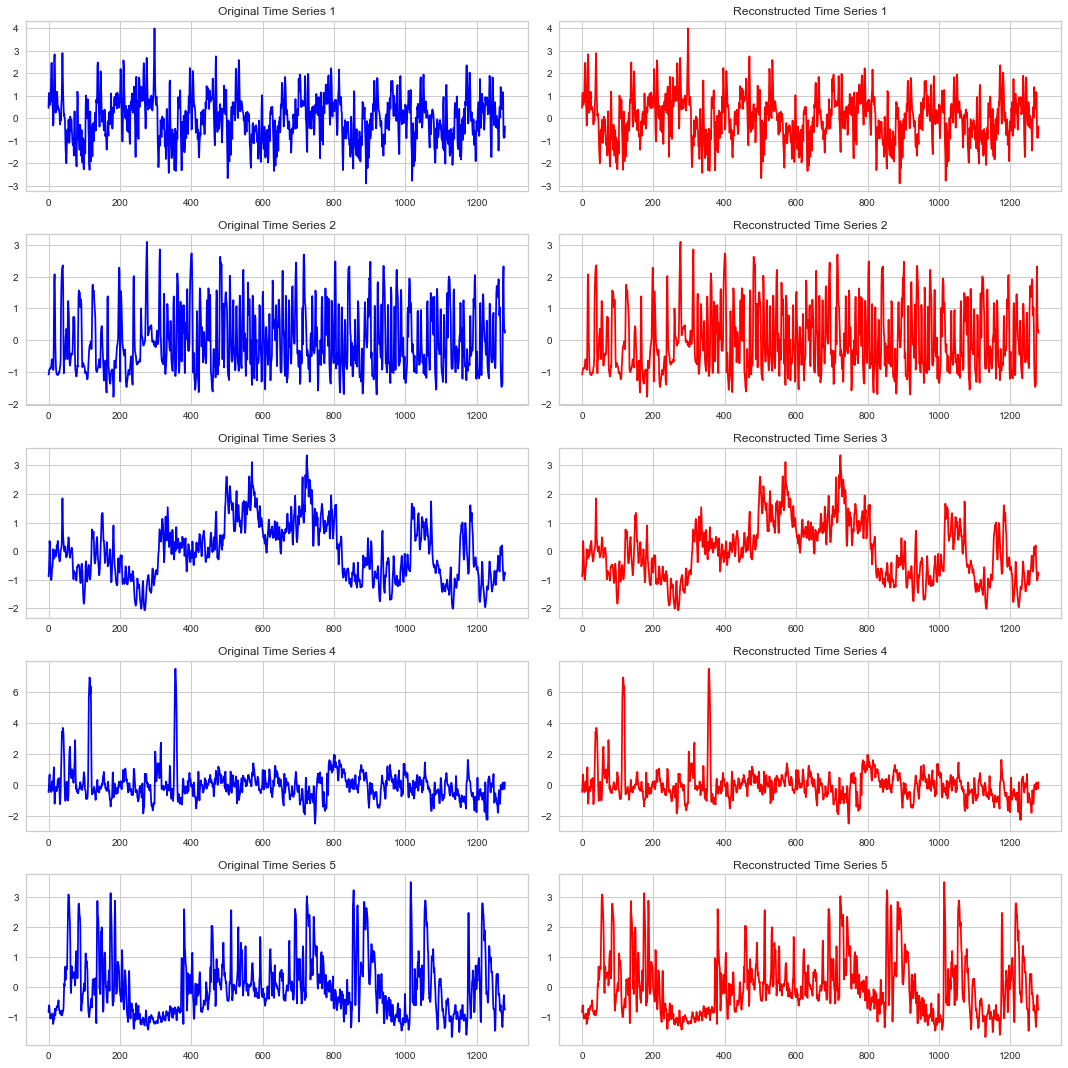

In [226]:
import matplotlib.pyplot as plt

# Assuming original_series_list contains the reconstructed original time series
# and X contains the original time series data

# Plotting the time series side by side
num_samples = 5  # Number of time series to plot

fig, axs = plt.subplots(num_samples, 2, figsize=(15, num_samples*3))

for i in range(num_samples):
    # Original time series
    axs[i, 0].plot(best_scaled_series_list[i], color='blue', label='Original')
    axs[i, 0].set_title('Original Time Series ' + str(i+1))
    
    # Reconstructed time series
    axs[i, 1].plot(best_original_series_list[i], color='red', label='Reconstructed')
    axs[i, 1].set_title('Reconstructed Time Series ' + str(i+1))

plt.tight_layout()
plt.show()


# Find best PAA intervals with w_best = 150

In [38]:
"""
import numpy as np
import pandas as pd
from sktime.transformations.panel.dictionary_based import PAA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# Define window size for rolling mean
w = 150  # Best value from previous studies

# Define num_intervals values to search
num_intervals_values = [10, 50, 100, 150, 200]

# Initialize a list to store Euclidean distances
euclidean_distances = []

# Initialize scaler
scaler = StandardScaler()

for num_intervals in num_intervals_values:
    for i in range(len(X)): # why over 10 error?
        ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series

        # Scale the time series
        tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))

        # Mean centering and standardization (amplitude scaling)
        ts_scaled = ((tss - tss.mean()) / tss.std())

        # Apply rolling window mean (noise)
        ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w, min_periods=1).mean()

        # Perform Piecewise Aggregate Approximation (PAA)
        paa = PAA(num_intervals=num_intervals)
        ts_paa = paa.fit_transform(pd.DataFrame(ts_smoothed)).iloc[:, 0].values

        # Invert PAA transformation
        inverse_paa = np.repeat(ts_paa, len(ts_smoothed) // len(ts_paa))

        # Invert scaling transformation
        reconstructed_series = inverse_paa * tss.std() + tss.mean()

        # Interpolate reconstructed series to match the length of original series
        reconstructed_series_interp = np.interp(np.arange(len(ts)), np.arange(len(reconstructed_series)), reconstructed_series)

        # Calculate Euclidean distance between original and reconstructed time series
        distance = euclidean(ts, reconstructed_series_interp)
        euclidean_distances.append(distance)

# Find the best num_intervals that minimizes Euclidean distance
best_num_intervals = num_intervals_values[np.argmin(euclidean_distances)]

print("Best num_intervals:", best_num_intervals)
print("Minimum Euclidean distance:", min(euclidean_distances))

"""

IndexError: list index out of range

# Preprocess TS with best values so far

In [75]:
w=150  # from past studies
best_intervals=100 # from past studies
ts_paa_list = []

for i in range(len(X)):
        ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series

        # Scale the time series
        tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))

        # Mean centering and standardization (amplitude scaling)
        ts_scaled = ((tss - tss.mean()) / tss.std())

        # Apply rolling window mean (noise)
        ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w, min_periods=1).mean()

        # Perform Piecewise Aggregate Approximation (PAA)
        paa = PAA(num_intervals=best_intervals)
        ts_paa = paa.fit_transform(pd.DataFrame(ts_smoothed)).iloc[:, 0].values
        ts_paa_list.append([ts_paa])

# Clustering DTW, silhouette: 0.11

In [76]:
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.utils.plotting import plot_series

In [77]:
clusterer = TimeSeriesKMeans(n_clusters=2, metric="dtw", distance_params={"itakura_max_slope": 1.0}, verbose=True)

In [78]:
len(ts_paa_list)

10000

In [79]:
ts_paa_vect = np.array(ts_paa_list)

In [80]:
ts_paa_vect.shape

(10000, 1, 100)

In [81]:
clusterer

TimeSeriesKMeans(distance_params={'itakura_max_slope': 1.0}, n_clusters=2,
                 verbose=True)

In [82]:
x_train = ts_paa_vect

In [83]:
len(x_train)

10000

In [84]:
y_train = ts_paa_vect[0][0]

In [85]:
y_train.shape

(100,)

In [86]:
%%time
clusterer.fit(x_train)

Iteration 0, inertia 130527.22670007052.
Iteration 1, inertia 95028.62629544933.
Iteration 2, inertia 92743.52223612487.
Iteration 3, inertia 91486.63256547753.
Iteration 4, inertia 91288.08781389297.
Iteration 5, inertia 91195.27720005446.
Iteration 6, inertia 91157.67566512042.
Iteration 7, inertia 91147.13082263505.
Iteration 8, inertia 91138.02524354933.
Iteration 9, inertia 91131.27856686144.
Iteration 10, inertia 91133.07900973927.
Iteration 11, inertia 91138.52972576322.
Converged at iteration 12: strict convergence.
Iteration 0, inertia 131026.52473064017.
Iteration 1, inertia 119409.3000077829.
Iteration 2, inertia 96192.3155666682.
Iteration 3, inertia 91508.92008229424.
Iteration 4, inertia 91244.03728321126.
Iteration 5, inertia 91158.99696899738.
Iteration 6, inertia 91150.60320092016.
Iteration 7, inertia 91145.85314226232.
Iteration 8, inertia 91142.17453409811.
Iteration 9, inertia 91131.27856686144.
Iteration 10, inertia 91133.07900973927.
Iteration 11, inertia 91138.5

TimeSeriesKMeans(distance_params={'itakura_max_slope': 1.0}, n_clusters=2,
                 verbose=True)

In [96]:
df = pd.DataFrame(np.squeeze(x_train))
df["cluster"] = clusterer.labels_
df.head()

0         1         2         3         4         5         6  \
0  0.932631  1.085709  0.938462  0.853384  0.508171  0.305165  0.129727   
1 -0.956458 -0.542278 -0.554500 -0.237225 -0.166849 -0.164022 -0.178701   
2 -0.521587 -0.394016 -0.236718 -0.072974 -0.042981 -0.065848 -0.165853   
3 -0.085872 -0.075685 -0.095785  0.348066  0.321419  0.425583  0.429340   
4 -0.831735 -0.933980 -0.856064 -0.789621 -0.370661 -0.125088  0.024922   

          7         8         9  ...        91        92        93        94  \
0 -0.010412 -0.091773 -0.145410  ... -0.296286 -0.158085 -0.230865 -0.296161   
1 -0.088938 -0.176822 -0.187004  ... -0.077343 -0.077177 -0.021862 -0.015454   
2 -0.254938 -0.350244 -0.368472  ... -0.205382 -0.262279 -0.302242 -0.439879   
3  0.357053  0.319508  0.601068  ... -0.324798 -0.300550 -0.380862 -0.473673   
4  0.143125  0.146552  0.090181  ... -0.237590 -0.247533 -0.283047 -0.371534   

         95        96        97        98        99  cluster  
0 -0.252021 -0.163997 -0.089335 -0.048608  0.020939        1  
1 -0.007769 -0.049098 -0.064309  0.027570 -0.004320        0  
2 -0.588655 -0.689171 -0.721375 -0.688488 -0.610974        0  
3 -0.511611 -0.521003 -0.490265 -0.524751 -0.566497        1  
4 -0.320842 -0.305481 -0.246158 -0.222489 -0.204771        0  

[5 rows x 101 columns]

In [97]:
df

0         1         2         3         4         5         6  \
0     0.932631  1.085709  0.938462  0.853384  0.508171  0.305165  0.129727   
1    -0.956458 -0.542278 -0.554500 -0.237225 -0.166849 -0.164022 -0.178701   
2    -0.521587 -0.394016 -0.236718 -0.072974 -0.042981 -0.065848 -0.165853   
3    -0.085872 -0.075685 -0.095785  0.348066  0.321419  0.425583  0.429340   
4    -0.831735 -0.933980 -0.856064 -0.789621 -0.370661 -0.125088  0.024922   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.502753 -0.443889  0.017447  0.024041 -0.153825 -0.196433 -0.205162   
9996  0.068992 -0.447434 -0.818529 -0.700689 -0.657197 -0.759398 -0.883428   
9997  0.064563  0.366106  0.647109  0.990835  0.980199  0.852442  0.660623   
9998 -1.779434 -1.393835 -1.341993 -1.209972 -1.103692 -1.072307 -1.061056   
9999 -0.444423 -0.920139 -0.930467 -1.075614 -1.179824 -1.151025 -1.064835   

             7         8         9  ...        91        92        93  \
0    -0.010412 -0.091773 -0.145410  ... -0.296286 -0.158085 -0.230865   
1    -0.088938 -0.176822 -0.187004  ... -0.077343 -0.077177 -0.021862   
2    -0.254938 -0.350244 -0.368472  ... -0.205382 -0.262279 -0.302242   
3     0.357053  0.319508  0.601068  ... -0.324798 -0.300550 -0.380862   
4     0.143125  0.146552  0.090181  ... -0.237590 -0.247533 -0.283047   
...        ...       ...       ...  ...       ...       ...       ...   
9995 -0.094239 -0.131914 -0.108605  ...  0.352239  0.364092  0.301545   
9996 -0.907408 -0.859071 -0.852946  ...  0.859789  0.772542  0.712782   
9997  0.595820  0.631397  0.610890  ...  0.146661  0.127851  0.160479   
9998 -1.092497 -1.097682 -1.119913  ...  0.931833  0.963740  0.928949   
9999 -0.961032 -0.988713 -0.855362  ...  0.160405 -0.115092 -0.261872   

            94        95        96        97        98        99  cluster  
0    -0.296161 -0.252021 -0.163997 -0.089335 -0.048608  0.020939        1  
1    -0.015454 -0.007769 -0.049098 -0.064309  0.027570 -0.004320        0  
2    -0.439879 -0.588655 -0.689171 -0.721375 -0.688488 -0.610974        0  
3    -0.473673 -0.511611 -0.521003 -0.490265 -0.524751 -0.566497        1  
4    -0.371534 -0.320842 -0.305481 -0.246158 -0.222489 -0.204771        0  
...        ...       ...       ...       ...       ...       ...      ...  
9995  0.263173  0.322603  0.298548  0.253441  0.221801  0.287332        0  
9996  0.656883  0.695428  0.744616  0.751572  0.635105  0.473611        0  
9997  0.233427  0.249760  0.288826  0.358865  0.309179  0.401637        1  
9998  0.865514  0.653830  0.396272  0.018035 -0.280724 -0.517783        0  
9999 -0.343323 -0.368708 -0.318327 -0.195961 -0.108218 -0.041426        0  

[10000 rows x 101 columns]

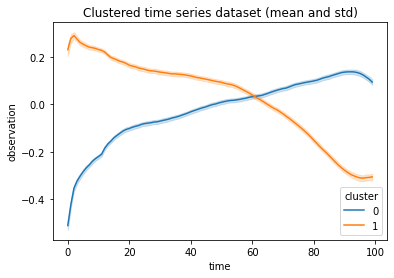

In [98]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

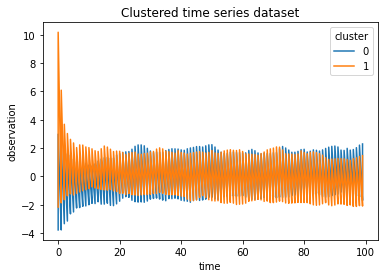

In [99]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

# Clustering Euclidean Dist, silhouette: 0.13

In [132]:
w=150  # from past studies
best_intervals=100 # from past studies
ts_nopaa_list = []

for i in range(len(X)):
        ts = X[i][0]  # Assuming X is a list of lists where each inner list contains a single time series

        # Scale the time series
        tss = scaler.fit_transform(np.array(ts).reshape(-1, 1))

        # Mean centering and standardization (amplitude scaling)
        ts_scaled = ((tss - tss.mean()) / tss.std())

        # Apply rolling window mean (noise)
        ts_smoothed = pd.Series(ts_scaled.squeeze()).rolling(window=w, min_periods=1).mean()
        ts_nopaa_list.append([ts_smoothed])

In [134]:
ts_nopaa_vect = np.array(ts_nopaa_list)

In [192]:
ts_nopaa_vect.shape

(2000, 1, 1280)

In [137]:
x_train = ts_nopaa_vect

In [191]:
len(x_train)

2000

In [193]:
x_train.shape

(2000, 1, 1280)

In [140]:
y_train = ts_nopaa_vect[0][0]

In [141]:
y_train.shape

(1280,)

271.966 --> 174.706 --> 168.972 --> 167.423 --> 166.601 --> 166.233 --> 166.119 --> 166.053 --> 166.024 --> 166.011 --> 166.006 --> 166.005 --> 166.005 --> 166.003 --> 166.002 --> 166.000 --> 166.000 --> 166.000 --> 
220.674 --> 165.494 --> 160.460 --> 157.612 --> 155.477 --> 154.086 --> 153.067 --> 152.510 --> 152.179 --> 151.918 --> 151.800 --> 151.758 --> 151.731 --> 151.705 --> 151.689 --> 151.679 --> 151.671 --> 151.666 --> 151.663 --> 151.661 --> 151.659 --> 151.656 --> 151.646 --> 151.636 --> 151.629 --> 151.625 --> 151.623 --> 151.620 --> 151.614 --> 151.611 --> 151.609 --> 151.608 --> 151.607 --> 151.607 --> 
199.220 --> 152.164 --> 148.113 --> 145.678 --> 144.037 --> 143.154 --> 142.603 --> 142.271 --> 142.111 --> 142.048 --> 141.977 --> 141.943 --> 141.931 --> 141.921 --> 141.918 --> 141.911 --> 141.907 --> 141.907 --> 141.907 --> 
181.615 --> 144.430 --> 141.276 --> 140.082 --> 139.189 --> 138.618 --> 138.170 --> 137.843 --> 137.580 --> 137.378 --> 137.207 --> 137.042 --> 1

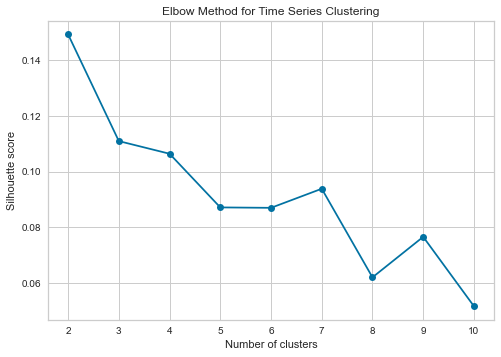

In [201]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Assuming you have your time series data stored in x_train

# Define the range of possible numbers of clusters
n_clusters_range = range(2, 11)  # Assuming you want to test from 2 to 10 clusters

# Initialize lists to store silhouette scores
silhouette_scores = []

# Loop over each possible number of clusters
for n_clusters in n_clusters_range:
    # Instantiate the TimeSeriesKMeans clusterer
    clusterer = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
    
    # Reshape x_train to comply with the expected shape
    x_train_reshaped = np.reshape(x_train, (x_train.shape[0], x_train.shape[2]))
    
    # Fit the clusterer to your time series data
    cluster_labels = clusterer.fit_predict(x_train_reshaped)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(x_train_reshaped, cluster_labels, metric="euclidean")
    silhouette_scores.append(silhouette_avg)

# Plot the elbow method for silhouette scores
plt.figure()
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Elbow Method for Time Series Clustering')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()


197.914 --> 169.905 --> 167.476 --> 166.676 --> 166.236 --> 166.075 --> 166.021 --> 166.006 --> 165.992 --> 165.988 --> 165.985 --> 165.984 --> 165.983 --> 165.983 --> 165.983 --> 
208.709 --> 158.957 --> 156.656 --> 156.021 --> 155.540 --> 155.198 --> 154.911 --> 154.671 --> 154.526 --> 154.371 --> 154.233 --> 154.080 --> 153.907 --> 153.764 --> 153.658 --> 153.583 --> 153.509 --> 153.436 --> 153.349 --> 153.260 --> 153.186 --> 153.150 --> 153.133 --> 153.109 --> 153.086 --> 153.069 --> 153.055 --> 153.048 --> 153.028 --> 153.016 --> 153.003 --> 152.989 --> 152.962 --> 152.938 --> 152.925 --> 152.919 --> 152.914 --> 152.910 --> 152.907 --> 152.902 --> 152.894 --> 152.875 --> 152.850 --> 152.831 --> 152.808 --> 152.795 --> 152.787 --> 152.770 --> 152.744 --> 152.726 --> 
196.790 --> 158.222 --> 152.197 --> 149.415 --> 147.370 --> 145.253 --> 143.845 --> 143.136 --> 142.659 --> 142.261 --> 142.071 --> 141.997 --> 141.954 --> 141.935 --> 141.923 --> 141.916 --> 141.914 --> 141.913 --> 14

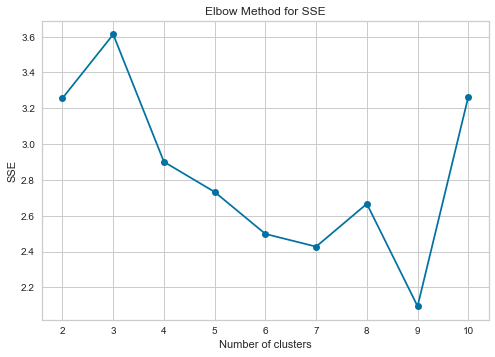

In [203]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Assuming you have your time series data stored in x_train

# Define the range of possible numbers of clusters
n_clusters_range = range(2, 11)  # Assuming you want to test from 2 to 10 clusters

# Initialize a list to store SSE
sse = []

# Reshape x_train to comply with the expected shape
x_train_reshaped = np.reshape(x_train, (x_train.shape[0], -1))

# Loop over each possible number of clusters
for n_clusters in n_clusters_range:
    # Instantiate the TimeSeriesKMeans clusterer
    clusterer = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
    
    # Fit the clusterer to your time series data
    cluster_labels = clusterer.fit_predict(x_train_reshaped)
    
    # Reshape cluster centers to 2D
    cluster_centers_reshaped = np.reshape(clusterer.cluster_centers_, (n_clusters, -1))
    
    # Calculate SSE
    closest, _ = pairwise_distances_argmin_min(cluster_centers_reshaped, x_train_reshaped)
    sse.append(np.sum(np.min(pairwise_distances_argmin_min(x_train_reshaped, cluster_centers_reshaped), axis=1)))

# Plot the elbow method for SSE
plt.plot(n_clusters_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for SSE')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()


In [205]:
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.utils.plotting import plot_series   # best num clusters is 2
clusterer = TimeSeriesKMeans(n_clusters=2, metric="euclidean", verbose=True)

In [206]:
%%time
clusterer.fit(x_train)

Iteration 0, inertia 25387.365237314996.
Iteration 1, inertia 24166.911648680078.
Iteration 2, inertia 23910.235387692162.
Iteration 3, inertia 23820.03778336552.
Iteration 4, inertia 23796.064233574554.
Iteration 5, inertia 23787.620749446156.
Iteration 6, inertia 23783.507101722003.
Iteration 7, inertia 23782.149837380945.
Iteration 8, inertia 23782.194001736345.
Iteration 9, inertia 23782.16197946276.
Iteration 10, inertia 23782.11074435516.
Iteration 11, inertia 23781.965590826898.
Iteration 12, inertia 23781.817690429918.
Iteration 13, inertia 23781.475877963818.
Iteration 14, inertia 23781.3108028319.
Converged at iteration 15: strict convergence.
Iteration 0, inertia 25513.536524316078.
Iteration 1, inertia 24091.186792466036.
Iteration 2, inertia 23893.832671141667.
Iteration 3, inertia 23823.674516039966.
Iteration 4, inertia 23796.94332908812.
Iteration 5, inertia 23789.65363322872.
Iteration 6, inertia 23786.590033859542.
Iteration 7, inertia 23786.06090422297.
Iteration 8, 

TimeSeriesKMeans(metric='euclidean', n_clusters=2, verbose=True)

In [207]:
df = pd.DataFrame(np.squeeze(x_train))
df["cluster"] = clusterer.labels_
df.head()

0         1         2         3         4         5         6  \
0  0.458418  0.763552  0.884972  0.840710  0.790546  0.817947  0.805107   
1 -1.084611 -1.070874 -1.029090 -0.999424 -0.976329 -0.963162 -0.952745   
2 -0.884092 -0.831911 -0.661956 -0.408411 -0.291686 -0.290375 -0.350433   
3 -0.455156 -0.303593 -0.073343  0.113826  0.098953  0.025372 -0.028469   
4 -0.845692 -0.763205 -0.714108 -0.733734 -0.767357 -0.816875 -0.846714   

          7         8         9  ...      1271      1272      1273      1274  \
0  0.903475  1.072168  1.211254  ...  0.007590  0.015345  0.028144  0.044043   
1 -0.944251 -0.925697 -0.895906  ...  0.002565 -0.020010 -0.032489 -0.032980   
2 -0.430673 -0.495422 -0.530449  ... -0.613866 -0.605516 -0.599025 -0.595435   
3 -0.081591 -0.088664 -0.089926  ... -0.571140 -0.572646 -0.570591 -0.565517   
4 -0.861512 -0.877912 -0.894627  ... -0.210274 -0.213492 -0.214005 -0.210952   

       1275      1276      1277      1278      1279  cluster  
0  0.049949  0.048216  0.045997  0.050545  0.057200        1  
1 -0.027954 -0.030094 -0.033590 -0.030406 -0.023413        0  
2 -0.595797 -0.597675 -0.600134 -0.599607 -0.596514        1  
3 -0.561149 -0.558287 -0.558179 -0.560090 -0.559884        1  
4 -0.207775 -0.202588 -0.198439 -0.196993 -0.195166        0  

[5 rows x 1281 columns]

In [208]:
df

0          1          2          3          4         5  \
0      0.458418   0.763552   0.884972   0.840710   0.790546  0.817947   
1     -1.084611  -1.070874  -1.029090  -0.999424  -0.976329 -0.963162   
2     -0.884092  -0.831911  -0.661956  -0.408411  -0.291686 -0.290375   
3     -0.455156  -0.303593  -0.073343   0.113826   0.098953  0.025372   
4     -0.845692  -0.763205  -0.714108  -0.733734  -0.767357 -0.816875   
...         ...        ...        ...        ...        ...       ...   
1995   0.711827   0.765035   0.716457   0.737245   0.743251  0.782511   
1996  -1.170652  -1.276372  -1.219136  -1.209011  -1.257231 -1.250904   
1997  -0.450441  -0.372219   0.105771   0.391983   0.425899  0.423744   
1998   0.660472   0.908718   1.114568   1.208428   1.263786  1.271290   
1999  23.381067  18.414875  16.700801  13.734175  11.501420  9.357034   

             6         7         8         9  ...      1271      1272  \
0     0.805107  0.903475  1.072168  1.211254  ...  0.007590  0.015345   
1    -0.952745 -0.944251 -0.925697 -0.895906  ...  0.002565 -0.020010   
2    -0.350433 -0.430673 -0.495422 -0.530449  ... -0.613866 -0.605516   
3    -0.028469 -0.081591 -0.088664 -0.089926  ... -0.571140 -0.572646   
4    -0.846714 -0.861512 -0.877912 -0.894627  ... -0.210274 -0.213492   
...        ...       ...       ...       ...  ...       ...       ...   
1995  0.743871  0.735402  0.733434  0.739211  ...  0.083029  0.075764   
1996 -1.258167 -1.241547 -1.196434 -1.180122  ...  0.004930 -0.004890   
1997  0.393140  0.348486  0.209980  0.125819  ...  0.171382  0.172981   
1998  1.230899  1.182262  1.139918  1.110424  ... -0.076124 -0.089765   
1999  7.588991  6.237375  5.008026  4.046843  ... -0.105052 -0.109095   

          1273      1274      1275      1276      1277      1278      1279  \
0     0.028144  0.044043  0.049949  0.048216  0.045997  0.050545  0.057200   
1    -0.032489 -0.032980 -0.027954 -0.030094 -0.033590 -0.030406 -0.023413   
2    -0.599025 -0.595435 -0.595797 -0.597675 -0.600134 -0.599607 -0.596514   
3    -0.570591 -0.565517 -0.561149 -0.558287 -0.558179 -0.560090 -0.559884   
4    -0.214005 -0.210952 -0.207775 -0.202588 -0.198439 -0.196993 -0.195166   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.069540  0.063860  0.057911  0.052372  0.050055  0.049839  0.048544   
1996 -0.016677 -0.024322 -0.031252 -0.035664 -0.039082 -0.048671 -0.054373   
1997  0.172523  0.167564  0.159126  0.151777  0.148244  0.143576  0.140795   
1998 -0.106559 -0.122895 -0.136588 -0.150393 -0.164652 -0.178237 -0.190185   
1999 -0.115983 -0.119366 -0.117179 -0.114238 -0.113777 -0.115916 -0.117870   

      cluster  
0           1  
1           0  
2           1  
3           1  
4           0  
...       ...  
1995        1  
1996        0  
1997        0  
1998        1  
1999        1  

[2000 rows x 1281 columns]

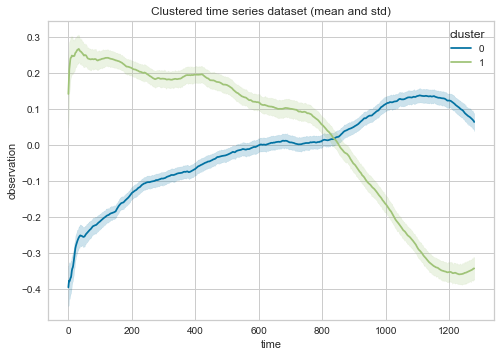

In [209]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

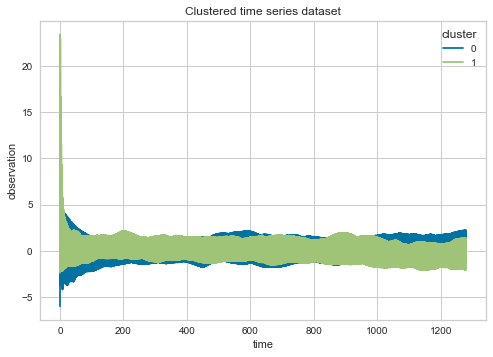

In [210]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

# Explore and analysis with PCA

In [211]:
cluster_0 = df[df["cluster"] == 0]

In [212]:
cluster_0

0         1         2         3         4         5         6  \
1    -1.084611 -1.070874 -1.029090 -0.999424 -0.976329 -0.963162 -0.952745   
4    -0.845692 -0.763205 -0.714108 -0.733734 -0.767357 -0.816875 -0.846714   
7     0.061223  0.056819  0.005696 -0.087819 -0.169306 -0.237783 -0.267882   
8     0.658544  0.717499  0.714988  0.710279  0.700325  0.668996  0.636916   
10    0.219594  0.161711  0.166461  0.275584  0.382484  0.443885  0.496302   
...        ...       ...       ...       ...       ...       ...       ...   
1992  2.323094  1.132114  0.371753 -0.002611  0.190502  0.421266  0.304277   
1993  0.534993  0.433932  0.642297  1.096574  1.246332  1.108324  0.859526   
1994  2.147236  1.559367  1.188746  0.985235  0.952403  0.758510  0.799687   
1996 -1.170652 -1.276372 -1.219136 -1.209011 -1.257231 -1.250904 -1.258167   
1997 -0.450441 -0.372219  0.105771  0.391983  0.425899  0.423744  0.393140   

             7         8         9  ...      1271      1272      1273  \
1    -0.944251 -0.925697 -0.895906  ...  0.002565 -0.020010 -0.032489   
4    -0.861512 -0.877912 -0.894627  ... -0.210274 -0.213492 -0.214005   
7    -0.269952 -0.303513 -0.337909  ...  0.371277  0.374993  0.379219   
8     0.592015  0.539646  0.482116  ... -0.083300 -0.114445 -0.153669   
10    0.538143  0.560718  0.570662  ...  0.390590  0.418267  0.445490   
...        ...       ...       ...  ...       ...       ...       ...   
1992  0.186538  0.199189  0.156035  ... -0.059347 -0.058759 -0.062245   
1993  0.632625  0.432930  0.291990  ... -0.077598 -0.080455 -0.077247   
1994  0.877942  0.868298  0.889805  ... -0.127304 -0.130183 -0.137405   
1996 -1.241547 -1.196434 -1.180122  ...  0.004930 -0.004890 -0.016677   
1997  0.348486  0.209980  0.125819  ...  0.171382  0.172981  0.172523   

          1274      1275      1276      1277      1278      1279  cluster  
1    -0.032980 -0.027954 -0.030094 -0.033590 -0.030406 -0.023413        0  
4    -0.210952 -0.207775 -0.202588 -0.198439 -0.196993 -0.195166        0  
7     0.382819  0.385383  0.388960  0.391310  0.390512  0.385997        0  
8    -0.196784 -0.239532 -0.281262 -0.318940 -0.348016 -0.370691        0  
10    0.467646  0.482641  0.502341  0.521847  0.532656  0.534205        0  
...        ...       ...       ...       ...       ...       ...      ...  
1992 -0.069097 -0.068847 -0.072195 -0.073697 -0.070028 -0.070670        0  
1993 -0.066424 -0.050813 -0.040449 -0.034092 -0.031615 -0.025676        0  
1994 -0.148055 -0.149669 -0.141668 -0.136861 -0.141478 -0.147572        0  
1996 -0.024322 -0.031252 -0.035664 -0.039082 -0.048671 -0.054373        0  
1997  0.167564  0.159126  0.151777  0.148244  0.143576  0.140795        0  

[1154 rows x 1281 columns]

In [213]:
cluster_1 = df[df["cluster"] == 1]

In [214]:
cluster_1

0          1          2          3          4         5  \
0      0.458418   0.763552   0.884972   0.840710   0.790546  0.817947   
2     -0.884092  -0.831911  -0.661956  -0.408411  -0.291686 -0.290375   
3     -0.455156  -0.303593  -0.073343   0.113826   0.098953  0.025372   
5     -1.049534  -1.042774  -1.023385  -1.007057  -0.988443 -0.976125   
6     -0.819785  -0.803191  -0.758424  -0.708961  -0.653346 -0.635970   
...         ...        ...        ...        ...        ...       ...   
1985  -0.625940  -0.623816  -0.725402  -0.784247  -0.766984 -0.685759   
1989   1.948488   2.228178   2.100912   1.532748   1.391615  1.488962   
1995   0.711827   0.765035   0.716457   0.737245   0.743251  0.782511   
1998   0.660472   0.908718   1.114568   1.208428   1.263786  1.271290   
1999  23.381067  18.414875  16.700801  13.734175  11.501420  9.357034   

             6         7         8         9  ...      1271      1272  \
0     0.805107  0.903475  1.072168  1.211254  ...  0.007590  0.015345   
2    -0.350433 -0.430673 -0.495422 -0.530449  ... -0.613866 -0.605516   
3    -0.028469 -0.081591 -0.088664 -0.089926  ... -0.571140 -0.572646   
5    -0.975269 -0.978339 -0.980882 -0.986874  ... -0.545678 -0.541130   
6    -0.643559 -0.641498 -0.628043 -0.602052  ... -0.521777 -0.506884   
...        ...       ...       ...       ...  ...       ...       ...   
1985 -0.637775 -0.591416 -0.557629 -0.534388  ... -0.489340 -0.517424   
1989  1.442312  1.258533  1.094058  0.920892  ... -0.207420 -0.195226   
1995  0.743871  0.735402  0.733434  0.739211  ...  0.083029  0.075764   
1998  1.230899  1.182262  1.139918  1.110424  ... -0.076124 -0.089765   
1999  7.588991  6.237375  5.008026  4.046843  ... -0.105052 -0.109095   

          1273      1274      1275      1276      1277      1278      1279  \
0     0.028144  0.044043  0.049949  0.048216  0.045997  0.050545  0.057200   
2    -0.599025 -0.595435 -0.595797 -0.597675 -0.600134 -0.599607 -0.596514   
3    -0.570591 -0.565517 -0.561149 -0.558287 -0.558179 -0.560090 -0.559884   
5    -0.535794 -0.530144 -0.523707 -0.516818 -0.512351 -0.508579 -0.504896   
6    -0.495183 -0.485321 -0.477518 -0.471226 -0.466194 -0.462795 -0.463153   
...        ...       ...       ...       ...       ...       ...       ...   
1985 -0.545466 -0.564712 -0.571573 -0.575605 -0.582141 -0.587917 -0.592226   
1989 -0.191157 -0.197761 -0.201624 -0.206497 -0.210251 -0.222344 -0.228413   
1995  0.069540  0.063860  0.057911  0.052372  0.050055  0.049839  0.048544   
1998 -0.106559 -0.122895 -0.136588 -0.150393 -0.164652 -0.178237 -0.190185   
1999 -0.115983 -0.119366 -0.117179 -0.114238 -0.113777 -0.115916 -0.117870   

      cluster  
0           1  
2           1  
3           1  
5           1  
6           1  
...       ...  
1985        1  
1989        1  
1995        1  
1998        1  
1999        1  

[846 rows x 1281 columns]

In [215]:
cluster_0.describe()

0            1            2            3            4  \
count  1154.000000  1154.000000  1154.000000  1154.000000  1154.000000   
mean     -0.394059    -0.385987    -0.375670    -0.377626    -0.376988   
std       0.964752     0.926218     0.892983     0.862982     0.837746   
min      -5.979402    -3.640382    -3.190342    -3.011019    -3.355482   
25%      -1.030713    -0.997269    -0.935746    -0.936653    -0.921730   
50%      -0.472685    -0.480322    -0.480491    -0.471186    -0.465057   
75%       0.094639     0.090083     0.115210     0.100417     0.095640   
max       4.314513     4.532384     4.783274     4.969901     5.093287   

                 5            6            7            8            9  ...  \
count  1154.000000  1154.000000  1154.000000  1154.000000  1154.000000  ...   
mean     -0.373638    -0.369157    -0.367666    -0.367048    -0.362416  ...   
std       0.815044     0.793818     0.776354     0.757432     0.734076  ...   
min      -3.678180    -3.915200    -4.080320    -4.192935    -3.950636  ...   
25%      -0.908594    -0.896984    -0.872131    -0.850098    -0.837200  ...   
50%      -0.449682    -0.446403    -0.425358    -0.409883    -0.417528  ...   
75%       0.090399     0.072701     0.062803     0.045975     0.048584  ...   
max       5.064932     4.951967     4.824290     4.588667     4.351858  ...   

              1271         1272         1273         1274         1275  \
count  1154.000000  1154.000000  1154.000000  1154.000000  1154.000000   
mean      0.073212     0.072364     0.071357     0.070203     0.069090   
std       0.412248     0.413302     0.414500     0.415850     0.417265   
min      -1.392418    -1.417717    -1.439258    -1.451752    -1.468447   
25%      -0.146115    -0.148283    -0.153067    -0.154832    -0.156599   
50%       0.051805     0.054047     0.055493     0.055820     0.052655   
75%       0.272034     0.271659     0.271935     0.272478     0.273259   
max       2.183688     2.188169     2.192879     2.198580     2.202422   

              1276         1277         1278         1279  cluster  
count  1154.000000  1154.000000  1154.000000  1154.000000   1154.0  
mean      0.068115     0.067181     0.065904     0.063713      0.0  
std       0.418667     0.420051     0.421613     0.423332      0.0  
min      -1.500613    -1.536644    -1.569986    -1.600170      0.0  
25%      -0.155075    -0.154505    -0.153726    -0.159156      0.0  
50%       0.050371     0.047396     0.044062     0.041459      0.0  
75%       0.269173     0.269508     0.269351     0.268523      0.0  
max       2.201705     2.204051     2.223378     2.241250      0.0  

[8 rows x 1281 columns]

In [216]:
cluster_1.describe()

0           1           2           3           4           5  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean     0.141315    0.165217    0.194537    0.209789    0.218938    0.228562   
std      1.507702    1.396006    1.232529    1.114719    1.034861    0.968758   
min     -2.363840   -2.167999   -2.109936   -2.130145   -2.144131   -2.152423   
25%     -0.521977   -0.494368   -0.456153   -0.464117   -0.449326   -0.421914   
50%     -0.021409    0.003559    0.062466    0.106426    0.128545    0.128743   
75%      0.566032    0.601474    0.687985    0.686688    0.686409    0.667155   
max     23.381067   22.976995   16.700801   13.734175   11.501420    9.357034   

                6           7           8           9  ...        1271  \
count  846.000000  846.000000  846.000000  846.000000  ...  846.000000   
mean     0.235742    0.240579    0.241545    0.242655  ...   -0.346234   
std      0.918543    0.877432    0.841519    0.812195  ...    0.448535   
min     -2.153553   -2.153788   -2.147095   -2.130808  ...   -1.986095   
25%     -0.367617   -0.342510   -0.338801   -0.312232  ...   -0.576217   
50%      0.153751    0.163399    0.162727    0.147674  ...   -0.302985   
75%      0.656882    0.665133    0.670846    0.667172  ...   -0.065320   
max      7.588991    6.430215    5.765414    5.206203  ...    1.366314   

             1272        1273        1274        1275        1276        1277  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean    -0.345701   -0.345010   -0.344436   -0.343841   -0.343047   -0.342122   
std      0.449475    0.450642    0.451879    0.453050    0.454222    0.455454   
min     -1.991269   -1.996862   -2.003825   -2.013683   -2.024398   -2.035891   
25%     -0.572362   -0.569761   -0.569229   -0.572133   -0.570066   -0.568476   
50%     -0.300760   -0.301792   -0.304670   -0.301166   -0.298328   -0.294611   
75%     -0.066055   -0.063060   -0.065469   -0.058917   -0.056871   -0.058234   
max      1.373046    1.379653    1.386386    1.393130    1.399126    1.401475   

             1278        1279  cluster  
count  846.000000  846.000000    846.0  
mean    -0.341598   -0.341901      1.0  
std      0.456918    0.458470      0.0  
min     -2.047784   -2.056394      1.0  
25%     -0.563655   -0.570631      1.0  
50%     -0.294465   -0.297242      1.0  
75%     -0.059942   -0.057888      1.0  
max      1.397325    1.384698      1.0  

[8 rows x 1281 columns]

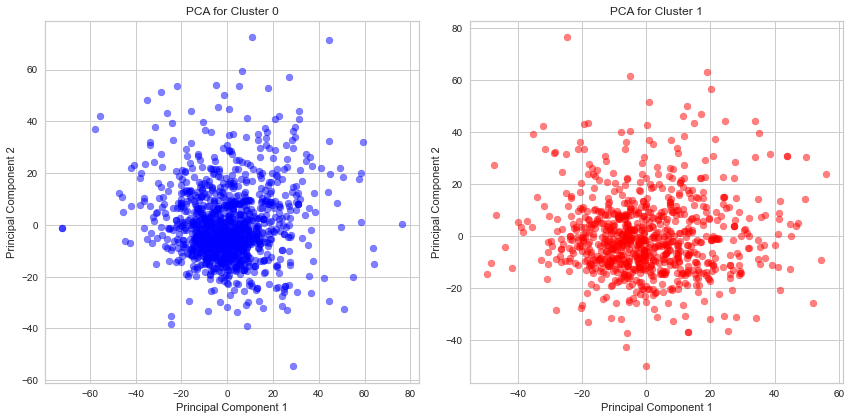

In [217]:
from sklearn.decomposition import PCA

# Assuming cluster_0 and cluster_1 are your dataframes containing the clustered data

# Convert column names to strings
cluster_0.columns = cluster_0.columns.astype(str)
cluster_1.columns = cluster_1.columns.astype(str)



# Apply PCA separately to each cluster

# PCA for Cluster 0
pca_cluster_0 = PCA(n_components=2)  # Specify the number of components as needed
scaled_cluster_0 = StandardScaler().fit_transform(cluster_0)  # Scale the data
pca_result_cluster_0 = pca_cluster_0.fit_transform(scaled_cluster_0)

# PCA for Cluster 1
pca_cluster_1 = PCA(n_components=2)  # Specify the number of components as needed
scaled_cluster_1 = StandardScaler().fit_transform(cluster_1)  # Scale the data
pca_result_cluster_1 = pca_cluster_1.fit_transform(scaled_cluster_1)


# Visualization
plt.figure(figsize=(12, 6))

# Plot PCA for Cluster 0
plt.subplot(1, 2, 1)
plt.scatter(pca_result_cluster_0[:, 0], pca_result_cluster_0[:, 1], c='blue', alpha=0.5)
plt.title('PCA for Cluster 0')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot PCA for Cluster 1
plt.subplot(1, 2, 2)
plt.scatter(pca_result_cluster_1[:, 0], pca_result_cluster_1[:, 1], c='red', alpha=0.5)
plt.title('PCA for Cluster 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()
plt.show()


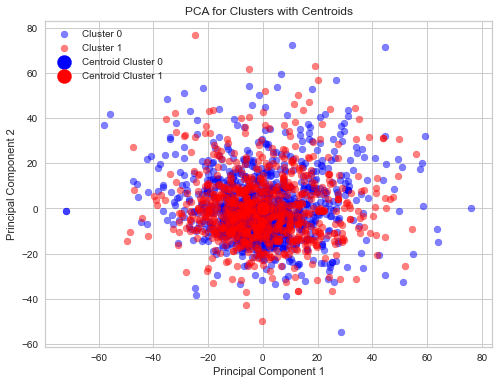

In [218]:
# Calculate centroids for each cluster
centroid_cluster_0 = np.mean(pca_result_cluster_0, axis=0)
centroid_cluster_1 = np.mean(pca_result_cluster_1, axis=0)


# Visualization
plt.figure(figsize=(8, 6))

# Plot PCA for Cluster 0
plt.scatter(pca_result_cluster_0[:, 0], pca_result_cluster_0[:, 1], c='blue', alpha=0.5, label='Cluster 0')

# Plot PCA for Cluster 1
plt.scatter(pca_result_cluster_1[:, 0], pca_result_cluster_1[:, 1], c='red', alpha=0.5, label='Cluster 1')


# Plot centroids
plt.scatter(centroid_cluster_0[0], centroid_cluster_0[1], marker='o', color='blue', s=200, label='Centroid Cluster 0')
plt.scatter(centroid_cluster_1[0], centroid_cluster_1[1], marker='o', color='red', s=200, label='Centroid Cluster 1')



plt.title('PCA for Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [219]:

# Assuming pca_result_cluster_0 and pca_result_cluster_1 are the PCA results for each cluster

# Concatenate the PCA results for both clusters
pca_results = np.concatenate((pca_result_cluster_0, pca_result_cluster_1), axis=0)

# Create labels for each data point indicating the cluster it belongs to
labels = np.array([0] * len(pca_result_cluster_0) + [1] * len(pca_result_cluster_1))

# Calculate silhouette score
silhouette = silhouette_score(pca_results, labels)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.006739180300496805


In [220]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming cluster_0, cluster_1, cluster_2, and cluster_3 are your dataframes containing the clustered data

# Concatenate all clusters into a single dataframe
all_clusters = pd.concat([cluster_0, cluster_1])

# Standardize the data
scaled_data = StandardScaler().fit_transform(all_clusters)

# Create labels for each data point based on cluster membership
labels = np.concatenate([np.zeros(len(cluster_0)), np.ones(len(cluster_1))])

# Compute silhouette score
silhouette_avg = silhouette_score(scaled_data, labels)
print("Overall silhouette score:", silhouette_avg)


Overall silhouette score: 0.13179921585538393


In [221]:
# Get explained variance ratio for each principal component
explained_variance_ratio_cluster_0 = pca_cluster_0.explained_variance_ratio_
explained_variance_ratio_cluster_1 = pca_cluster_1.explained_variance_ratio_


# Print explained variance ratio for each cluster
print("Explained Variance Ratio for Cluster 0:")
print(explained_variance_ratio_cluster_0)
print("Total Variance Explained by Cluster 0:", np.sum(explained_variance_ratio_cluster_0))

print("\nExplained Variance Ratio for Cluster 1:")
print(explained_variance_ratio_cluster_1)
print("Total Variance Explained by Cluster 1:", np.sum(explained_variance_ratio_cluster_1))



Explained Variance Ratio for Cluster 0:
[0.20858913 0.16813661]
Total Variance Explained by Cluster 0: 0.3767257455431021

Explained Variance Ratio for Cluster 1:
[0.2191469 0.1817143]
Total Variance Explained by Cluster 1: 0.40086119549180166


In [222]:
from sklearn.metrics import euclidean_distances

# Assuming pca_result_cluster_0 and pca_result_cluster_1 are the PCA results for each cluster
# Assuming centroid_cluster_0 and centroid_cluster_1 are the centroids of each cluster

# Calculate distances of each data point to the centroid for Cluster 0
distances_cluster_0 = euclidean_distances(pca_result_cluster_0, [centroid_cluster_0])

# Calculate distances of each data point to the centroid for Cluster 1
distances_cluster_1 = euclidean_distances(pca_result_cluster_1, [centroid_cluster_1])

# Set a threshold for outlier detection (e.g., based on a certain percentile of distances)
threshold = np.percentile(np.concatenate((distances_cluster_0, distances_cluster_1)), 95)

# Find outliers for Cluster 0
outliers_cluster_0 = pca_result_cluster_0[np.where(distances_cluster_0 > threshold)[0]]

# Find outliers for Cluster 1
outliers_cluster_1 = pca_result_cluster_1[np.where(distances_cluster_1 > threshold)[0]]

print("Number of outliers in Cluster 0:", outliers_cluster_0.shape[0])
print("Number of outliers in Cluster 1:", outliers_cluster_1.shape[0])


Number of outliers in Cluster 0: 60
Number of outliers in Cluster 1: 40


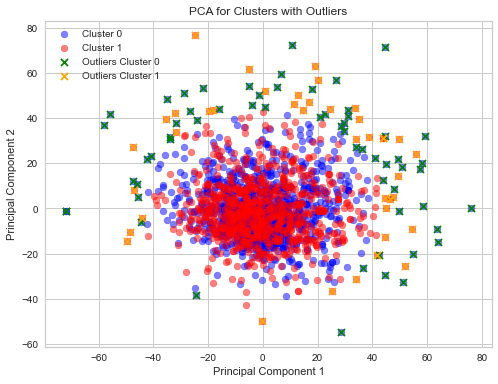

In [223]:
# Visualization
plt.figure(figsize=(8, 6))

# Plot PCA for Cluster 0
plt.scatter(pca_result_cluster_0[:, 0], pca_result_cluster_0[:, 1], c='blue', alpha=0.5, label='Cluster 0')

# Plot PCA for Cluster 1
plt.scatter(pca_result_cluster_1[:, 0], pca_result_cluster_1[:, 1], c='red', alpha=0.5, label='Cluster 1')

# Plot outliers for Cluster 0
plt.scatter(outliers_cluster_0[:, 0], outliers_cluster_0[:, 1], c='green', marker='x', label='Outliers Cluster 0')

# Plot outliers for Cluster 1
plt.scatter(outliers_cluster_1[:, 0], outliers_cluster_1[:, 1], c='orange', marker='x', label='Outliers Cluster 1')

plt.title('PCA for Clusters with Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

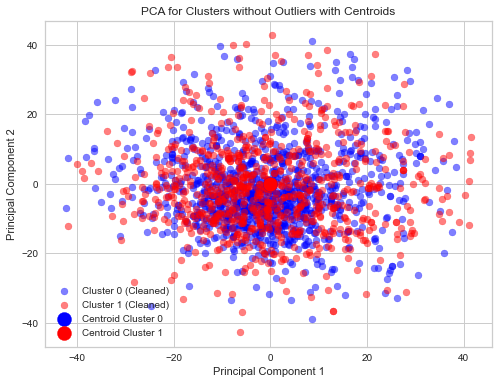

In [224]:
# Assuming pca_result_cluster_0 and pca_result_cluster_1 are the PCA results for each cluster
# Assuming outliers_cluster_0 and outliers_cluster_1 are the outliers for each cluster
# Assuming centroid_cluster_0 and centroid_cluster_1 are the centroids of each cluster

# Remove outliers from the original PCA results
cleaned_pca_result_cluster_0 = np.array([x for x in pca_result_cluster_0 if x not in outliers_cluster_0])
cleaned_pca_result_cluster_1 = np.array([x for x in pca_result_cluster_1 if x not in outliers_cluster_1])

# Visualization
plt.figure(figsize=(8, 6))

# Plot PCA for Cluster 0 without outliers
plt.scatter(cleaned_pca_result_cluster_0[:, 0], cleaned_pca_result_cluster_0[:, 1], c='blue', alpha=0.5, label='Cluster 0 (Cleaned)')

# Plot PCA for Cluster 1 without outliers
plt.scatter(cleaned_pca_result_cluster_1[:, 0], cleaned_pca_result_cluster_1[:, 1], c='red', alpha=0.5, label='Cluster 1 (Cleaned)')

# Plot centroids
plt.scatter(centroid_cluster_0[0], centroid_cluster_0[1], marker='o', color='blue', s=200, label='Centroid Cluster 0')
plt.scatter(centroid_cluster_1[0], centroid_cluster_1[1], marker='o', color='red', s=200, label='Centroid Cluster 1')

plt.title('PCA for Clusters without Outliers with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
